15439/15439 [==============================] - 24s 2ms/step


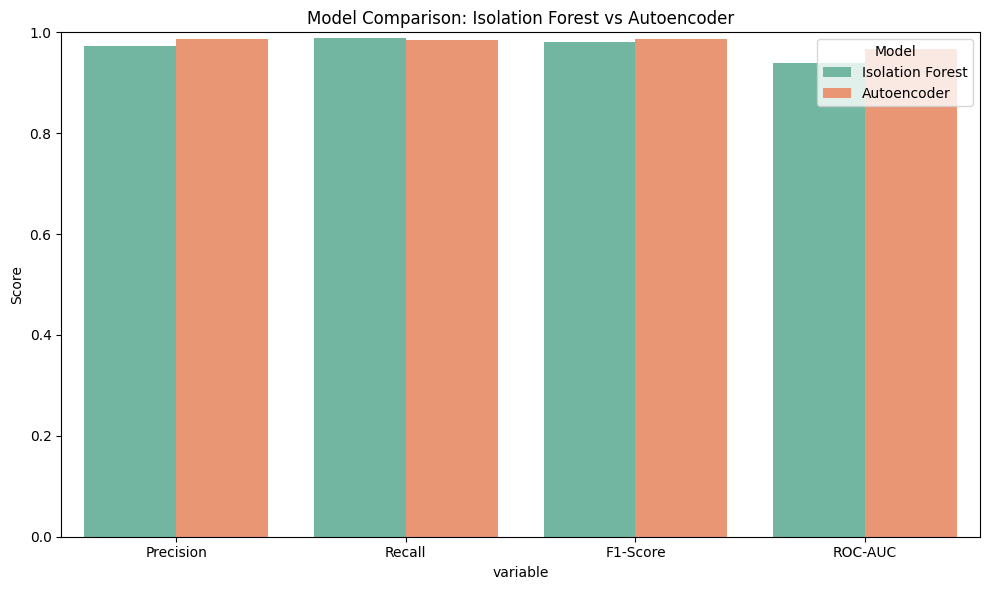

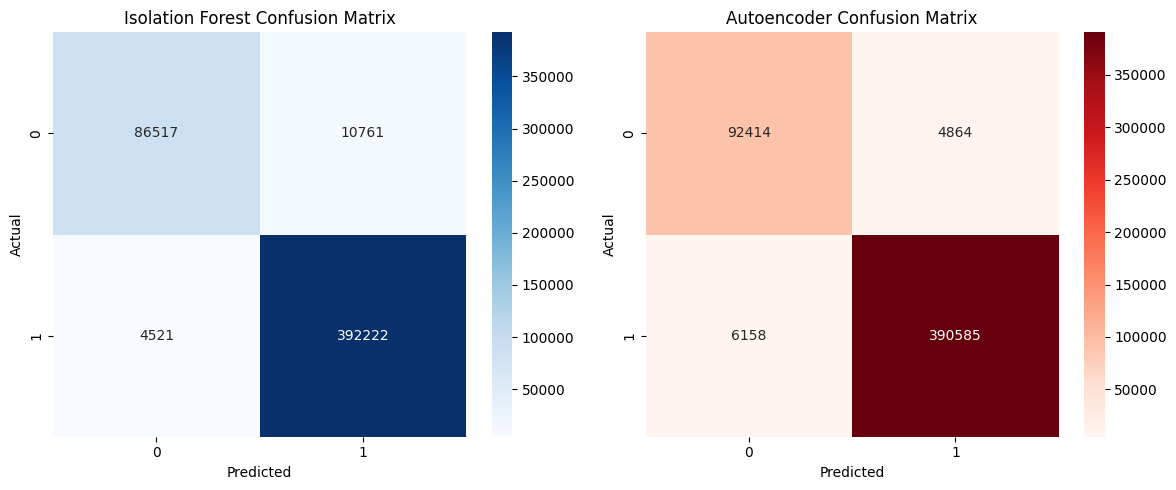


Final Model Performance Summary:
              Model  Precision  Recall  F1-Score  ROC-AUC
0  Isolation Forest     0.9733  0.9886    0.9809   0.9390
1       Autoencoder     0.9877  0.9845    0.9861   0.9672


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
from tensorflow.keras.models import load_model

# Load data
X_all = pd.read_csv("../data/processed/X_all_scaled.csv")
y_all = pd.read_csv("../data/processed/y_all.csv")

# --- Isolation Forest ---
iso_model = joblib.load("../models/isolation_forest_model.pkl")
y_pred_iso = np.where(iso_model.predict(X_all) == 1, 0, 1)

# --- Autoencoder ---
autoencoder = load_model("../models/autoencoder_model.h5")
threshold = joblib.load("../models/autoencoder_threshold.pkl")
X_all_pred = autoencoder.predict(X_all)
reconstruction_error = np.mean(np.power(X_all - X_all_pred, 2), axis=1)
y_pred_auto = (reconstruction_error > threshold).astype(int)

# Metrics extraction function
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    auc = roc_auc_score(y_true, y_pred)
    return {
        "Model": model_name,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "ROC-AUC": auc
    }

# Collect metrics
results = [
    get_metrics(y_all, y_pred_iso, "Isolation Forest"),
    get_metrics(y_all, y_pred_auto, "Autoencoder")
]
results_df = pd.DataFrame(results)

# 📊 Bar Chart Comparison
plt.figure(figsize=(10, 6))
melted = results_df.melt(id_vars="Model", value_vars=["Precision", "Recall", "F1-Score", "ROC-AUC"])
sns.barplot(data=melted, x="variable", y="value", hue="Model", palette="Set2")
plt.title("Model Comparison: Isolation Forest vs Autoencoder")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# 📉 Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_all, y_pred_iso), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Isolation Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_all, y_pred_auto), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title("Autoencoder Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 📄 Final Score Table
print("\nFinal Model Performance Summary:")
print(results_df.round(4))


# 📊 Model Comparison Report - CyberSentinel

This notebook compares the performance of two unsupervised models for anomaly detection:

- **Isolation Forest**
- **Autoencoder**

Both models were trained using only normal network traffic and evaluated on the full KDD'99 dataset (normal + attacks).

---

## ✅ Performance Summary

| Metric        | Isolation Forest | Autoencoder |
|---------------|------------------|-------------|
| **Precision** | 97.33%           | **98.77%**  |
| **Recall**    | **98.86%**       | 98.45%      |
| **F1-Score**  | 98.09%           | **98.61%**  |
| **ROC-AUC**   | 93.90%           | **96.72%**  |

---

## 🧠 Key Takeaways

- **Autoencoder** achieved higher overall accuracy (F1 & ROC-AUC).
- **Isolation Forest** detected slightly more attacks (higher recall).
- Both models perform well; choice depends on deployment needs:
  - Autoencoder: better precision and balance
  - Isolation Forest: faster, better recall

---

## 📌 Visuals Included
- Bar chart comparison of all metrics
- Side-by-side confusion matrices

---

This notebook provides a clear performance comparison to support model selection for deployment.
